## K Dominant Colors
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

Fig : Bishop, Pattern Recognition and ML

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.cluster import KMeans

In [2]:
imgg = image.load_img('./example.jpg')
imgg = image.img_to_array(imgg)
imgg.shape

(3325, 5326, 3)

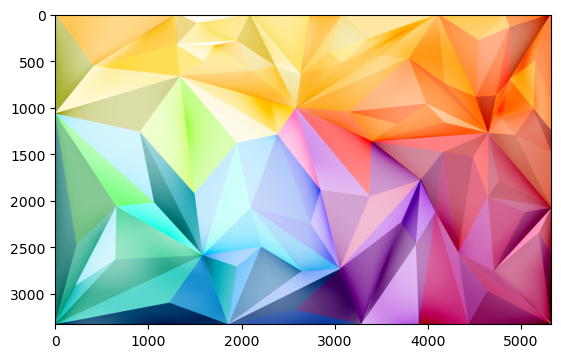

In [3]:
plt.imshow(image.array_to_img(imgg))
plt.show()

In [4]:
imgg = imgg.reshape((-1,3))
imgg.shape

(17708950, 3)

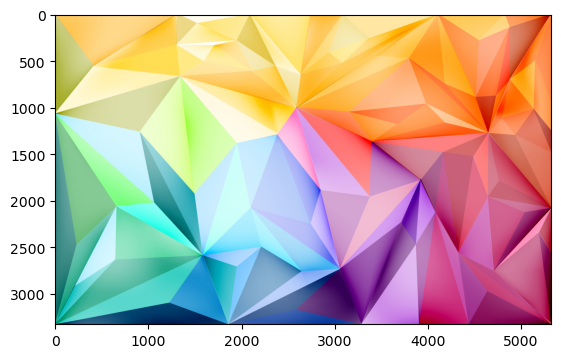

In [5]:
# but we know that it converts to BGR hence have to convert it back to RGB
img = cv2.imread('./example.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_size = img.shape
plt.imshow(img)
plt.show()

In [6]:
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img.shape

(3325, 5326, 3)

In [8]:
img = img.reshape((-1,3))
img.shape

(17708950, 3)

In [9]:
dominant_colors = 5
km = KMeans(n_clusters = dominant_colors, n_init=10)
km.fit(img)

C:\Users\saumi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [10]:
# these represent the 4 most dominating colors
km.cluster_centers_

array([[ 75.20265495, 167.0740175 , 169.78627638],
       [249.45196725, 158.93940763,  73.79721887],
       [197.50412006, 204.74009994, 239.58722113],
       [177.08373851,  71.15513051, 127.15428978],
       [237.35772236, 228.98101489, 152.14086495]])

In [11]:
centers = km.cluster_centers_

In [12]:
centers = np.array(centers,dtype = 'uint8')
centers

array([[ 75, 167, 169],
       [249, 158,  73],
       [197, 204, 239],
       [177,  71, 127],
       [237, 228, 152]], dtype=uint8)

### Plot what colors these are?

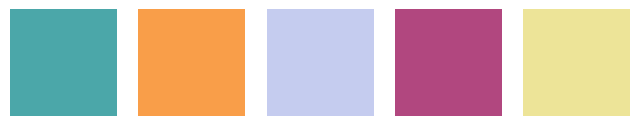

In [13]:
i = 1

plt.figure(figsize=(8,2))
colors = []
for x in centers:

    plt.subplot(1,5,i)
    colors.append(x)
    
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:] = x
    
    plt.imshow(a)
    plt.axis('off')
    i += 1 
plt.show()

### Segmenting Our Original Image

In [14]:
km.labels_

array([2, 1, 1, ..., 3, 3, 3])

In [15]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4])

In [16]:
img.shape

(17708950, 3)

In [17]:
new_img = np.zeros(img.shape,dtype='uint8')

In [18]:
new_img.shape

(17708950, 3)

In [19]:
colors

[array([ 75, 167, 169], dtype=uint8),
 array([249, 158,  73], dtype=uint8),
 array([197, 204, 239], dtype=uint8),
 array([177,  71, 127], dtype=uint8),
 array([237, 228, 152], dtype=uint8)]

In [20]:
km.labels_.shape

(17708950,)

In [21]:
colors[km.labels_[0]]

array([197, 204, 239], dtype=uint8)

In [22]:
original_size

(3325, 5326, 3)

In [23]:
new_img[0] , colors[km.labels_[22]]

(array([0, 0, 0], dtype=uint8), array([249, 158,  73], dtype=uint8))

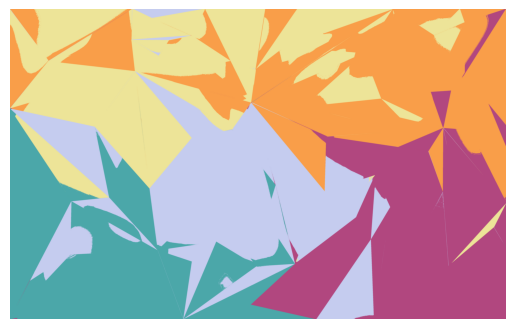

In [24]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_size))
plt.imshow(new_img)
plt.axis('off')
plt.show()